In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [3]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 준비

In [5]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,
                    shuffle=True,
                    noise=0.05,
                    random_state=0,
                    factor=0.5)

df = pd.DataFrame(X, columns=['feature1', 'feature2'])

df.head()

,feature1,feature2
0,0.519781,-0.015981
1,-0.057719,-0.420279
2,-0.805155,-0.662227
3,0.316549,0.312730
4,-0.304804,0.407563


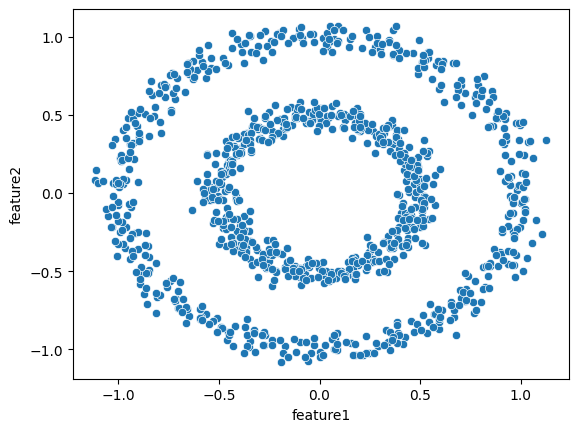

In [6]:
sns.scatterplot(data=df, x='feature1', y='feature2')
plt.show()

### k-means clustergin

In [7]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
df['kmeans'] = km.fit_predict(X)

df.head()

,feature1,feature2,kmeans
0,0.519781,-0.015981,0
1,-0.057719,-0.420279,1
2,-0.805155,-0.662227,1
3,0.316549,0.312730,0
4,-0.304804,0.407563,1


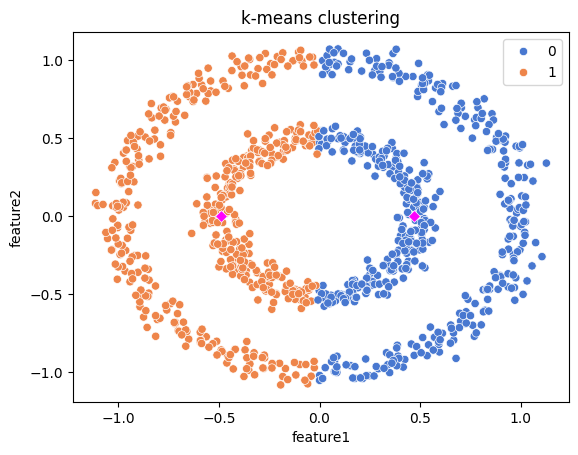

In [8]:
sns.scatterplot(df, x='feature1', y='feature2', hue='kmeans', palette='muted')
sns.scatterplot(x=km.cluster_centers_[:,0], y=km.cluster_centers_[:,1], 
                marker='D', color='magenta')
plt.title('k-means clustering')
plt.show()

### DBSCAN

In [ ]:
# from sklearn.cluster import DBSCAN
# dbscan = DBSCAN(eps=0.2,
#                 min_samples=10)
# df['dbscan'] = dbscan.fit_predict(X)
# df.head()

,feature1,feature2,kmeans,dbscan
0,0.519781,-0.015981,1,0
1,-0.057719,-0.420279,0,0
2,-0.805155,-0.662227,0,1
3,0.316549,0.312730,1,0
4,-0.304804,0.407563,1,0


In [ ]:
from sklearn.cluster import DBSCAN

# K-Means와 모양을 맞추기 위해 강사님이 우리가 배웠던 구조와 비슷한 모양으로 DBSCAN 모델을 생성,학습시키심
model = DBSCAN(eps=0.2,
                min_samples=10)

model.fit(X)

df['dbscan'] = model.labels_
df

,feature1,feature2,kmeans,dbscan
0,0.519781,-0.015981,0,0
1,-0.057719,-0.420279,1,0
2,-0.805155,-0.662227,1,1
3,0.316549,0.312730,0,0
4,-0.304804,0.407563,1,0
...,...,...,...,...
995,-0.222906,-0.326809,1,0
996,-0.766648,0.677558,1,1
997,-0.012036,0.396755,1,0
998,0.398129,0.318982,0,0


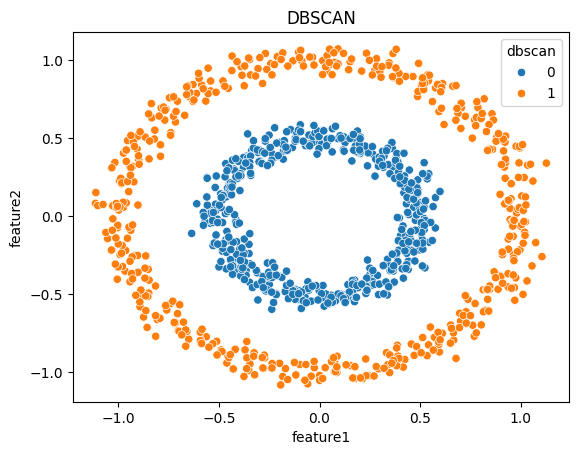

In [10]:
sns.scatterplot(df, x='feature1', y='feature2', hue='dbscan')
plt.title('DBSCAN')
plt.show()